In [4]:
import math

import numpy as np
import pandas as pd
import seaborn as sns

from collections import Counter

# Linear Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor

# Support Vector Machine
from sklearn.svm import SVR

# Decision Trees and Ensemble Methods
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

# Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor

# Gaussian Processes
from sklearn.gaussian_process import GaussianProcessRegressor

# Neural Networks
from sklearn.neural_network import MLPRegressor

# Kernel Ridge Regression
from sklearn.kernel_ridge import KernelRidge

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

data_path = r'C:\Users\ShashankPC\Downloads\HousePricesART\train.csv'
dataDF = pd.read_csv(data_path)

***
### Data Charts

<Axes: xlabel='MSZoning', ylabel='Count'>

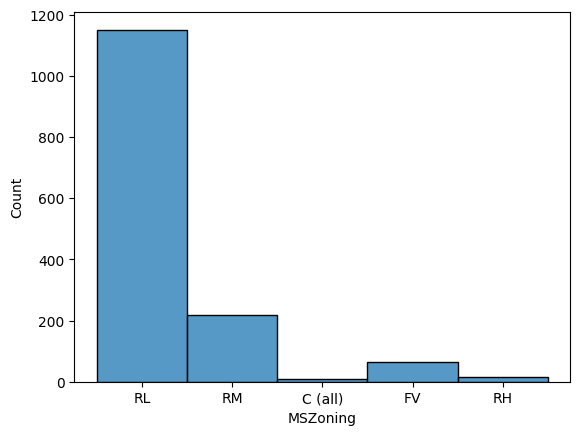

In [5]:
sns.histplot(data=dataDF['MSZoning'])

<Axes: xlabel='MSSubClass', ylabel='Count'>

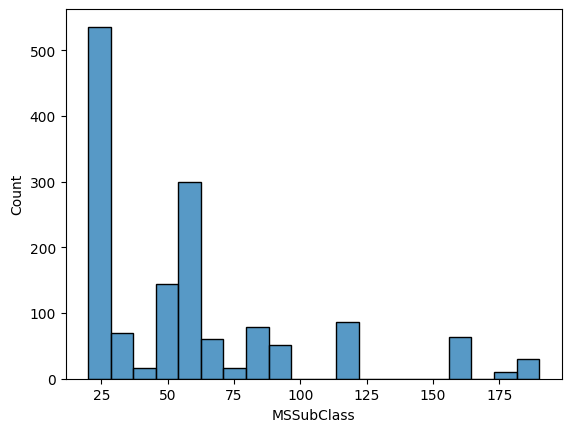

In [6]:
sns.histplot(data=dataDF['MSSubClass'])

<Axes: xlabel='LotFrontage', ylabel='Count'>

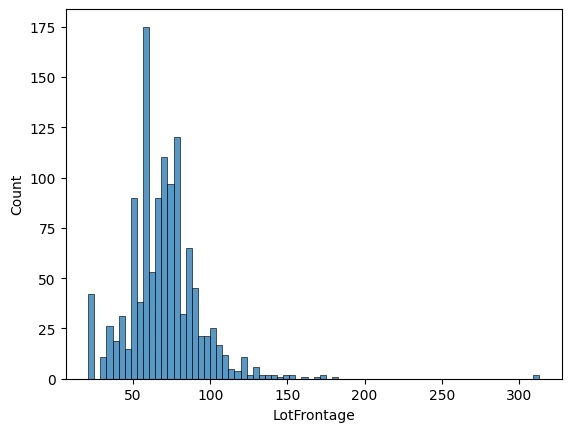

In [7]:
sns.histplot(data=dataDF['LotFrontage'])

<Axes: xlabel='LotArea', ylabel='Count'>

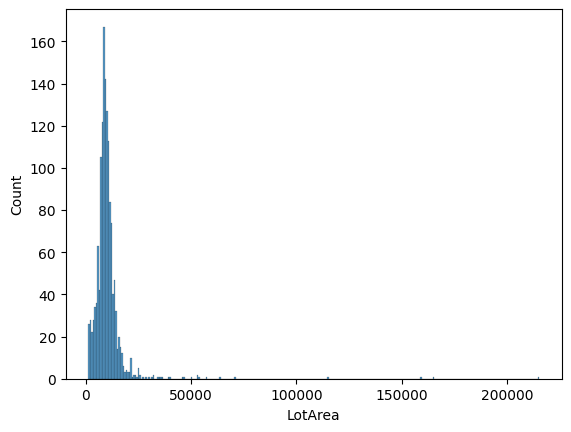

In [8]:
sns.histplot(data=dataDF['LotArea'])

<Axes: xlabel='Street', ylabel='Count'>

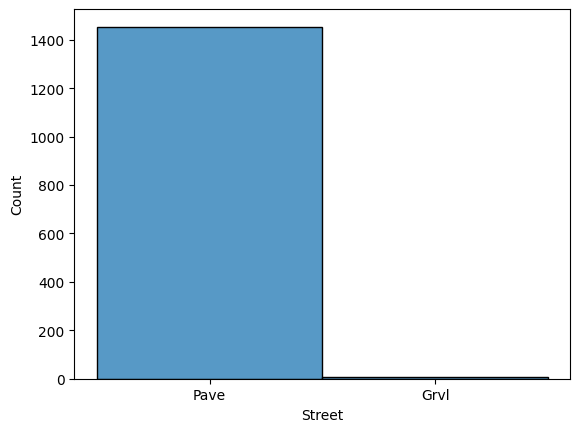

In [9]:
sns.histplot(data=dataDF['Street'])

<Axes: xlabel='Alley', ylabel='Count'>

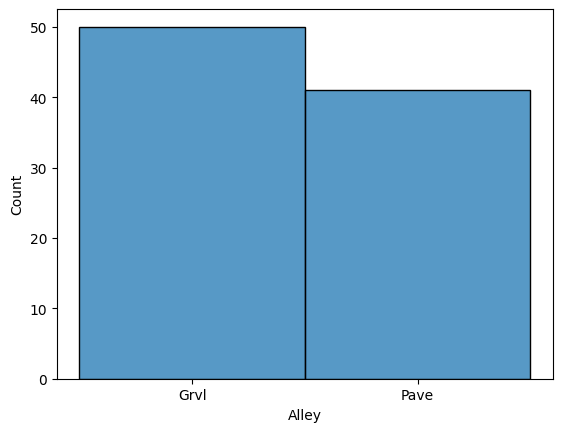

In [10]:
sns.histplot(data=dataDF['Alley'])

<Axes: xlabel='LotShape', ylabel='Count'>

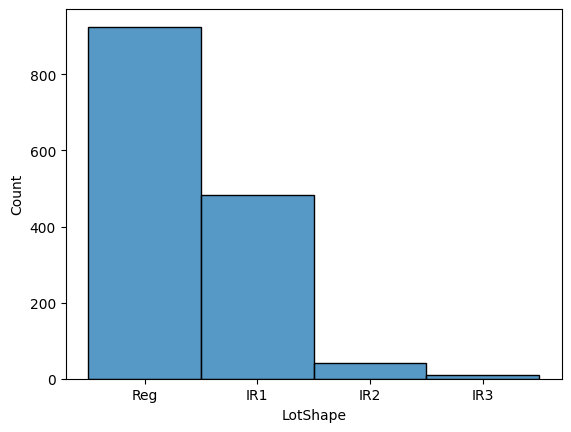

In [11]:
sns.histplot(data=dataDF['LotShape'])

<Axes: xlabel='LandContour', ylabel='Count'>

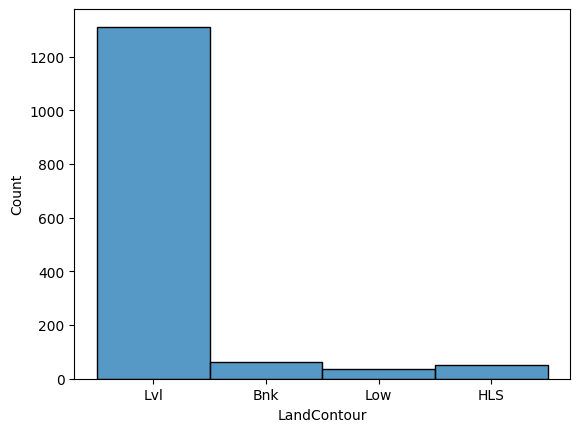

In [12]:
sns.histplot(data=dataDF['LandContour'])

<Axes: xlabel='Utilities', ylabel='Count'>

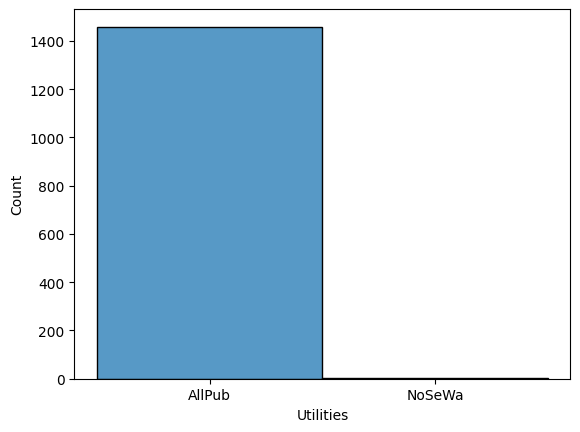

In [13]:
sns.histplot(data=dataDF['Utilities'])

<Axes: xlabel='LotConfig', ylabel='Count'>

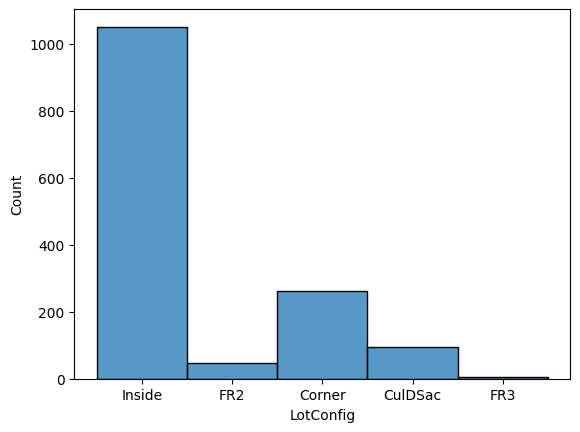

In [14]:
sns.histplot(data=dataDF['LotConfig'])

***
### Data Preprocessing

In [17]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Gradient Boosting Regressor" : GradientBoostingRegressor()
}

# Function to evaluate the model
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}:\n\tMean Squared Error: {mse}\n\tR^2 Score: {r2}\n")


In [ ]:
dataDF.select_dtypes(include=np.number).shape, dataDF.select_dtypes(include=object).shape

dataDF_dtnumber = dataDF.select_dtypes(include=np.number)
dataDF_dtobject = dataDF.select_dtypes(include=object)
dataDF_dtnumber.shape, dataDF_dtobject.shape

dataDF_dtobject.isna().sum()

dataDF_dtobject.LotShape.value_counts()

label_encoder_LotShape = LabelEncoder()

LotShape_labelencoded = label_encoder_LotShape.fit(dataDF_dtobject.LotShape).transform(dataDF_dtobject.LotShape)
pd.Series(LotShape_labelencoded).value_counts()

Counter(LotShape_labelencoded)

dataDF_dtobject_labelencoded = dataDF_dtobject.apply(lambda x: LabelEncoder().fit_transform(x))
dataDF_dtobject_labelencoded.shape

***
### Model -> Numerical-Features

In [24]:
# pd.set_option('display.max_rows', None)
# dataDF.is(0).sum()
# Counter(dataDF['LotArea']).is(0)
dataDF_dtnumber_select = dataDF_dtnumber[[
    'LotArea'
    ,'LotFrontage'
    , 'MoSold'
    , 'YrSold'
    ,'TotalBsmtSF'
    , 'MasVnrArea'
    ,'GrLivArea'
    ,'BsmtFullBath'
    ,'BsmtHalfBath'
    ,'FullBath'
    ,'HalfBath'
    ,'BedroomAbvGr'
    ,'KitchenAbvGr'
    ,'TotRmsAbvGrd'
    ,'Fireplaces'
    ,'GarageArea'
    ,'GarageCars'
    ,'GarageYrBlt'
    ,'ScreenPorch'
    ,'3SsnPorch'
    ,'EnclosedPorch'
    ,'OpenPorchSF'
    ,'WoodDeckSF'
    # ,'PoolArea'  decrese accuresy
    # ,'MiscVal'  
    ,'SalePrice']].copy()
dataDF_dtnumber_select = dataDF_dtnumber_select.dropna( axis=0)
dataDF1.shape

X = dataDF1.drop('SalePrice', axis=1)
y = dataDF1['SalePrice']
y = y.apply(lambda x: (math.log(x)))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for name, model in models.items():
    evaluate_model(name, model, X_train, X_test, y_train, y_test)

Linear Regression:
	Mean Squared Error: 0.024147876979174258
	R^2 Score: 0.8301641508417135

Ridge Regression:
	Mean Squared Error: 0.024045794174516168
	R^2 Score: 0.8308821153993646

Lasso Regression:
	Mean Squared Error: 0.031086169858088788
	R^2 Score: 0.7813660364643875

Decision Tree:
	Mean Squared Error: 0.047726084789902076
	R^2 Score: 0.6643348753066831

Random Forest:
	Mean Squared Error: 0.02405808954557241
	R^2 Score: 0.8307956401044203

Support Vector Regressor:
	Mean Squared Error: 0.03878719552659932
	R^2 Score: 0.727203501392289

K-Neighbors Regressor:
	Mean Squared Error: 0.048015833802997905
	R^2 Score: 0.6622970245372617

Gradient Boosting Regressor:
	Mean Squared Error: 0.019823242003326767
	R^2 Score: 0.860579994605375



***
### Model -> Categorical-Features + LableEncoded

In [261]:
dataDF_dtnumber = dataDF.select_dtypes(include=np.number)
dataDF_dtobject = dataDF.select_dtypes(include=object)
label_encoder_LotShape = LabelEncoder()
dataDF_dtobject_labelencoded = dataDF_dtobject.apply(lambda x: LabelEncoder().fit_transform(x))
dataDF_dtobject_labelencoded.shape


X = dataDF_dtobject_labelencoded
y = dataDF_dtnumber['SalePrice']
y = y.apply(lambda x: (math.log(x)))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for name, model in models.items():
    evaluate_model(name, model, X_train, X_test, y_train, y_test)

Linear Regression:
	Mean Squared Error: 0.05739605903337286
	R^2 Score: 0.6924335408695917

Ridge Regression:
	Mean Squared Error: 0.05742689747575356
	R^2 Score: 0.6922682878768277

Lasso Regression:
	Mean Squared Error: 0.18770284240303775
	R^2 Score: -0.005837327142055315

Decision Tree:
	Mean Squared Error: 0.07168351639520938
	R^2 Score: 0.6158717917745596

Random Forest:
	Mean Squared Error: 0.044440310681539676
	R^2 Score: 0.7618591027124533

Support Vector Regressor:
	Mean Squared Error: 0.05111066175152945
	R^2 Score: 0.7261149019031155

K-Neighbors Regressor:
	Mean Squared Error: 0.0573196411298784
	R^2 Score: 0.6928430390892917

Gradient Boosting Regressor:
	Mean Squared Error: 0.03939839177854272
	R^2 Score: 0.7888770752062751



***
### Model -> Categorical-Features + OneHotEncoder

In [19]:
dataDF_dtnumber = dataDF.select_dtypes(include=np.number)
dataDF_dtobject = dataDF.select_dtypes(include=object)

label_encoder_LotShape = LabelEncoder()
dataDF_dtobject_labelencoded = dataDF_dtobject.apply(lambda x: LabelEncoder().fit_transform(x))
dataDF_dtobject_labelencoded.shape

(1460, 43)

In [20]:
from sklearn.preprocessing import OneHotEncoder

dataDF_dtobject_ohc_encoded = OneHotEncoder().fit_transform(dataDF_dtobject_labelencoded)
dataDF_dtobject_ohc_encoded.shape

(1460, 267)

In [21]:
dataDF_dtobject_ohc_encoded_dense = pd.DataFrame(dataDF_dtobject_ohc_encoded.todense())

In [22]:
X = dataDF_dtobject_ohc_encoded_dense
y = dataDF_dtnumber['SalePrice']
y = y.apply(lambda x: (math.log(x)))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for name, model in models.items():
    evaluate_model(name, model, X_train, X_test, y_train, y_test)

Linear Regression:
	Mean Squared Error: 1.0630259816323546e+22
	R^2 Score: -5.6964039455075545e+22

Ridge Regression:
	Mean Squared Error: 0.030749609944874228
	R^2 Score: 0.8352230308201636

Lasso Regression:
	Mean Squared Error: 0.18770284240303775
	R^2 Score: -0.005837327142055315

Decision Tree:
	Mean Squared Error: 0.06671855566709987
	R^2 Score: 0.6424773709133342

Random Forest:
	Mean Squared Error: 0.03599573397243174
	R^2 Score: 0.8071107907380242

Support Vector Regressor:
	Mean Squared Error: 0.03593362118109245
	R^2 Score: 0.8074436326024426

K-Neighbors Regressor:
	Mean Squared Error: 0.04792759170709688
	R^2 Score: 0.7431719193920854

Gradient Boosting Regressor:
	Mean Squared Error: 0.034729807892731425
	R^2 Score: 0.8138944690673651



***
### Model -> Numerical + Categorical-Features